In [74]:
import numpy as np
import pandas as pd
import pickle

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
import xgboost as xgb

from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.pipeline import Pipeline

from  sklearn.metrics  import accuracy_score

pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_columns', 500)

In [2]:
#loading the df by pickle
df1 = pd.read_pickle("lovelybooks_df.pkl")
df1.shape

(51006, 2)

In [3]:
df2 = pd.read_pickle("lovelybooks_df_2.pkl")
df2.shape

(78637, 2)

In [4]:
df3 = pd.read_pickle("lovelybooks_df_3.pkl")
df3.shape

(24172, 2)

In [5]:
df4 = pd.read_pickle("lovelybooks_df_4.pkl")
df4.shape

(28761, 2)

In [6]:
df5 = pd.read_pickle("lovelybooks_df_5.pkl")
df5.shape

(18678, 2)

In [7]:
df6 = pd.read_pickle("lovelybooks_df_6.pkl")
df6.shape

(23902, 2)

In [8]:
df7 = pd.read_pickle("lovelybooks_df_7.pkl")
df7.shape

(43178, 2)

In [9]:
df8 = pd.read_pickle("lovelybooks_df_8.pkl")
df8.shape

(44639, 2)

In [10]:
df9 = pd.read_pickle("lovelybooks_df_9.pkl")
df9.shape

(31028, 2)

In [11]:
df10 = pd.read_pickle("lovelybooks_df_10.pkl")
df10.shape

(15947, 2)

In [12]:
df_all = pd.DataFrame()

In [15]:
df_all = df_all.append(df1)

In [16]:
df_all = df_all.append(df2)
df_all = df_all.append(df3)
df_all = df_all.append(df4)
df_all = df_all.append(df5)
df_all = df_all.append(df6)
df_all = df_all.append(df7)
df_all = df_all.append(df8)
df_all = df_all.append(df9)
df_all = df_all.append(df10)

In [17]:
df_all.shape

(359948, 2)

In [23]:
df_all.to_pickle('df_all.pkl')

In [22]:
df_all = df_all.reset_index(drop=True)

In [25]:
#rating columns is an object
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359948 entries, 0 to 359947
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   rating        359948 non-null  object
 1   fullTextHtml  359948 non-null  object
dtypes: object(2)
memory usage: 5.5+ MB


In [27]:
#changing 'rating' column to integer
df_all['rating'] = df_all['rating'].astype(int)

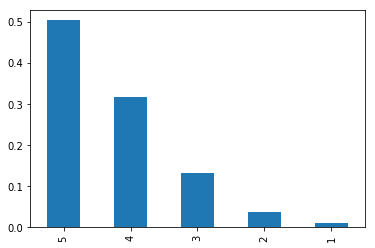

In [29]:
#checking the distribution of classes
#we can see that most of data is rated 5 or 4 and there is really small number of 1's and 2's
#that might be a problem for the model, but let's check the concept
df_all['rating'].value_counts(normalize=True).plot(kind='bar');

In [30]:
df_all['rating'].value_counts(normalize=True)

5    0.503003
4    0.315837
3    0.131619
2    0.038461
1    0.011079
Name: rating, dtype: float64

In [32]:
df_all['rating'].value_counts()

5    181055
4    113685
3     47376
2     13844
1      3988
Name: rating, dtype: int64

In [35]:
#preparing the train and test dataset
df_1_rating = df_all[df_all['rating'] == 1]
df_2_rating = df_all[df_all['rating'] == 2]
df_3_rating = df_all[df_all['rating'] == 3]
df_4_rating = df_all[df_all['rating'] == 4]
df_5_rating = df_all[df_all['rating'] == 5]

In [38]:
#creating df's with 3988 samples from each class (so that we have the same number of samples in each class)
df_2_rating_sampled = df_2_rating.sample(n=3988)
df_3_rating_sampled = df_3_rating.sample(n=3988)
df_4_rating_sampled = df_4_rating.sample(n=3988)
df_5_rating_sampled = df_5_rating.sample(n=3988)

In [41]:
#appending the sampled df's to one df
df_sampled = pd.DataFrame()
df_sampled = df_sampled.append(df_1_rating)
df_sampled = df_sampled.append(df_2_rating_sampled)
df_sampled = df_sampled.append(df_3_rating_sampled)
df_sampled = df_sampled.append(df_4_rating_sampled)
df_sampled = df_sampled.append(df_5_rating_sampled)
df_sampled.shape

(19940, 2)

In [42]:
df_sampled.to_pickle('df_sampled.pkl')

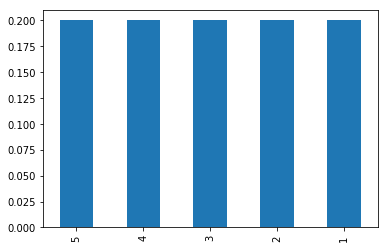

In [43]:
df_sampled['rating'].value_counts(normalize=True).plot(kind='bar');

In [44]:
#changing 'rating' column to integer
df_sampled['rating'] = df_sampled['rating'].astype(int)

In [47]:
X = df_sampled['fullTextHtml'].values
y = df_sampled['rating'].values

skf = StratifiedKFold(n_splits=2, random_state=8888, shuffle=True)
skf.get_n_splits(X, y)

2

In [48]:
print(skf)

StratifiedKFold(n_splits=2, random_state=8888, shuffle=True)


In [49]:
for train_index, test_index in skf.split(X, y):
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]

In [54]:
#bag of words
#Text preprocessing, tokenizing and filtering of stopwords are all included in CountVectorizer, 
#which builds a dictionary of features and transforms documents to feature vectors

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(9970, 106538)

In [63]:
#checking some typical words if they are in vocabulary
count_vect.vocabulary_.get('wunderbar')

102124

In [64]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(9970, 106538)

NAIVE BAYES

In [65]:
#training a Naive Bayes classifier
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [66]:
#testing on some simple examples
docs_new = ['Das war sehr gut und interresantes Film', 'Das Film was schrecklich']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

In [67]:
predicted = clf.predict(X_new_tfidf)
predicted

array([3, 1])

In [78]:
#In order to make the vectorizer => transformer => classifier easier to work with, scikit-learn provides a Pipeline class
#that behaves like a compound classifier

text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', MultinomialNB()),
 ])

In [79]:
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [80]:
#evaluation on test set
predicted = text_clf.predict(X_test)
print(accuracy_score(y_test,predicted))

0.43329989969909727


SVM

In [81]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=8888,
                          max_iter=5, tol=None)),
])

text_clf.fit(X_train, y_train)

predicted = text_clf.predict(X_test)
print(accuracy_score(y_test,predicted))

0.5091273821464393


In [82]:
#more detailed metrics
print(metrics.classification_report(y_test, predicted, target_names=['1','2','3','4','5']))

              precision    recall  f1-score   support

           1       0.56      0.75      0.64      1994
           2       0.51      0.31      0.38      1994
           3       0.47      0.44      0.45      1994
           4       0.48      0.22      0.30      1994
           5       0.50      0.83      0.63      1994

    accuracy                           0.51      9970
   macro avg       0.50      0.51      0.48      9970
weighted avg       0.50      0.51      0.48      9970



XGBOOST

In [85]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', xgb.XGBClassifier(random_state=8888,max_depth=5, n_estimators=100, objective='multi:softmax', num_class=5)),
])

text_clf.fit(X_train, y_train)

predicted = text_clf.predict(X_test)
print(accuracy_score(y_test,predicted))

0.49197592778335003


In [84]:
#more detailed metrics
print(metrics.classification_report(y_test, predicted, target_names=['1','2','3','4','5']))

              precision    recall  f1-score   support

           1       0.63      0.62      0.63      1994
           2       0.47      0.47      0.47      1994
           3       0.45      0.44      0.44      1994
           4       0.45      0.42      0.43      1994
           5       0.60      0.64      0.62      1994

    accuracy                           0.52      9970
   macro avg       0.52      0.52      0.52      9970
weighted avg       0.52      0.52      0.52      9970

